In [1]:
%matplotlib inline

import pandas as pd

In [8]:
import os

cwd = os.getcwd()
cwd
benchmark_result_path = os.path.realpath(
    os.path.join(cwd, "../data/benchmark-results.csv")
)
benchmark_result_path

'/Users/csalih/Developer/bsc-web-benchmark/benchmark/benchmark-analyze/data/benchmark-results.csv'

In [9]:
csv_header = ["framework", "metric", "os", "browser", "value"]
df = pd.read_csv(benchmark_result_path, names=csv_header)
df

,framework,metric,os,browser,value
0,app-angular,create_1000_duration,darwin,chromium,61.2
1,app-angular,create_10000_duration,darwin,chromium,578.6
2,app-angular,append_1000_rows_duration,darwin,chromium,58.7
3,app-angular,update_every_10th_row_duration,darwin,chromium,6.5
4,app-angular,swap_rows_duration,darwin,chromium,6.4
...,...,...,...,...,...
595,app-vue,create_1000_duration,darwin,webkit,61.0
596,app-vue,create_10000_duration,darwin,webkit,833.0
597,app-vue,append_1000_rows_duration,darwin,webkit,63.0
598,app-vue,update_every_10th_row_duration,darwin,webkit,16.0


In [ ]:
assert df.isnull().sum().sum() == 0

app-angular         Axes(0.1,0.559091;0.363636x0.340909)
app-leptos     Axes(0.536364,0.559091;0.363636x0.340909)
app-react               Axes(0.1,0.15;0.363636x0.340909)
app-vue            Axes(0.536364,0.15;0.363636x0.340909)
dtype: object

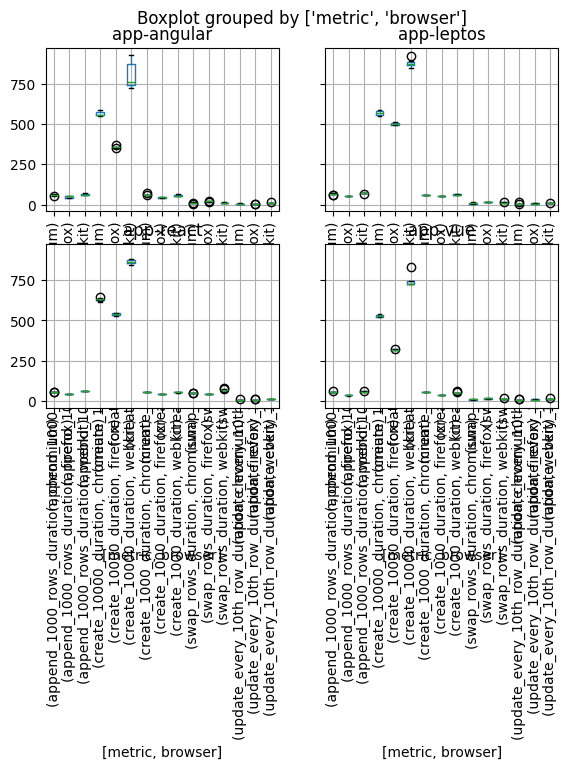

In [5]:
# df.mean(numeric_only=True)

# df[['metric', 'value']].mean(axis=0)

filtered_df = df[df.metric == "append_1000_rows_duration"]
filtered_df = df.groupby("framework")
filtered_df.boxplot(column="value", by=["metric", "browser"], rot=90)